### Load and parse metrics

In [2]:
import json

import matplotlib.pyplot as plt
import numpy as np


def load_metrics_from_file(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

### Plotting

In [8]:
def plot_first_last_val_accuracies(file_names):
    first_timestep_accs = []
    last_timestep_accs = []
    labels = []

    for file_name in file_names:
        metrics = load_metrics_from_file(file_name)
        val_accuracies_epoch = metrics['val_accuracies_epoch']
        # Extract first and last timestep accuracies
        first_timestep_accs.append(val_accuracies_epoch[-1][0])
        last_timestep_accs.append(val_accuracies_epoch[-1][-1])
        # Extract experiment label from filename
        parts = file_name.split("_")
        label = f"{parts[1][0]}L - {parts[2][0]}T"
        if 'transfer' in file_name:
            label += ' - transfer'
        if 'XXX' in file_name:
            label += ' and training LT'
        if 'separate_norms' in file_name:
            label += ' - separate norms'
        labels.append(label)

    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.bar(x - width/2, first_timestep_accs, width, label='First timestep')
    ax.bar(x + width/2, last_timestep_accs, width, label='Last timestep')

    ax.set_ylabel('Validation Accuracy', fontsize=15)
    ax.set_title('First and Last Timestep Validation Accuracies for each experiment (600 epochs)', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12, rotation=45)

    ax.legend(fontsize=12)

    ax.grid(axis='y')

    # Add vertical lines
    n_delimited_experiments = 4
    for i in range(1, len(labels) // n_delimited_experiments):
        ax.axvline(x=n_delimited_experiments*i - 0.5, color='c', linestyle='--')

    fig.tight_layout()

    plt.show()


def plot_val_and_train_accuracies_over_epochs_for_all_files(file_paths):
    fig, axs = plt.subplots(len(file_paths), 2, figsize=(20, 10*len(file_paths)))

    for i, file_path in enumerate(file_paths):
        metrics = load_metrics_from_file(file_path)
        val_accuracies = metrics['val_accuracies_epoch']
        train_accuracies = metrics['train_accuracies_epoch']

        epochs = list(range(len(val_accuracies))) 
        num_timesteps = len(val_accuracies[0])

        for j in range(num_timesteps):  
            val_accuracy_in_t_through_epochs = [val_acc_per_epoch[j] for val_acc_per_epoch in val_accuracies]
            train_accuracy_in_t_through_epochs = [train_acc_per_epoch[j] for train_acc_per_epoch in train_accuracies]

            axs[i][0].plot(epochs, val_accuracy_in_t_through_epochs, label=f't={j+1}')  # Plot validation accuracies
            axs[i][1].plot(epochs, train_accuracy_in_t_through_epochs, label=f't={j+1}')  # Plot train accuracies

        axs[i][0].set_ylabel('Validation Accuracy', fontsize=15)
        axs[i][0].set_xlabel('Epoch', fontsize=15)
        axs[i][0].set_title(file_path + ' (Validation)', fontsize=15)  # Use file path as title for validation
        axs[i][0].tick_params(labelsize=15)
        axs[i][0].legend(fontsize=12)
        axs[i][0].grid()

        axs[i][1].set_ylabel('Train Accuracy', fontsize=15)
        axs[i][1].set_xlabel('Epoch', fontsize=15)
        axs[i][1].set_title(file_path + ' (Train)', fontsize=15)  # Use file path as title for training
        axs[i][1].tick_params(labelsize=15)
        axs[i][1].legend(fontsize=12)
        axs[i][1].grid()

    plt.tight_layout()
    plt.show()

## 3 Blocks

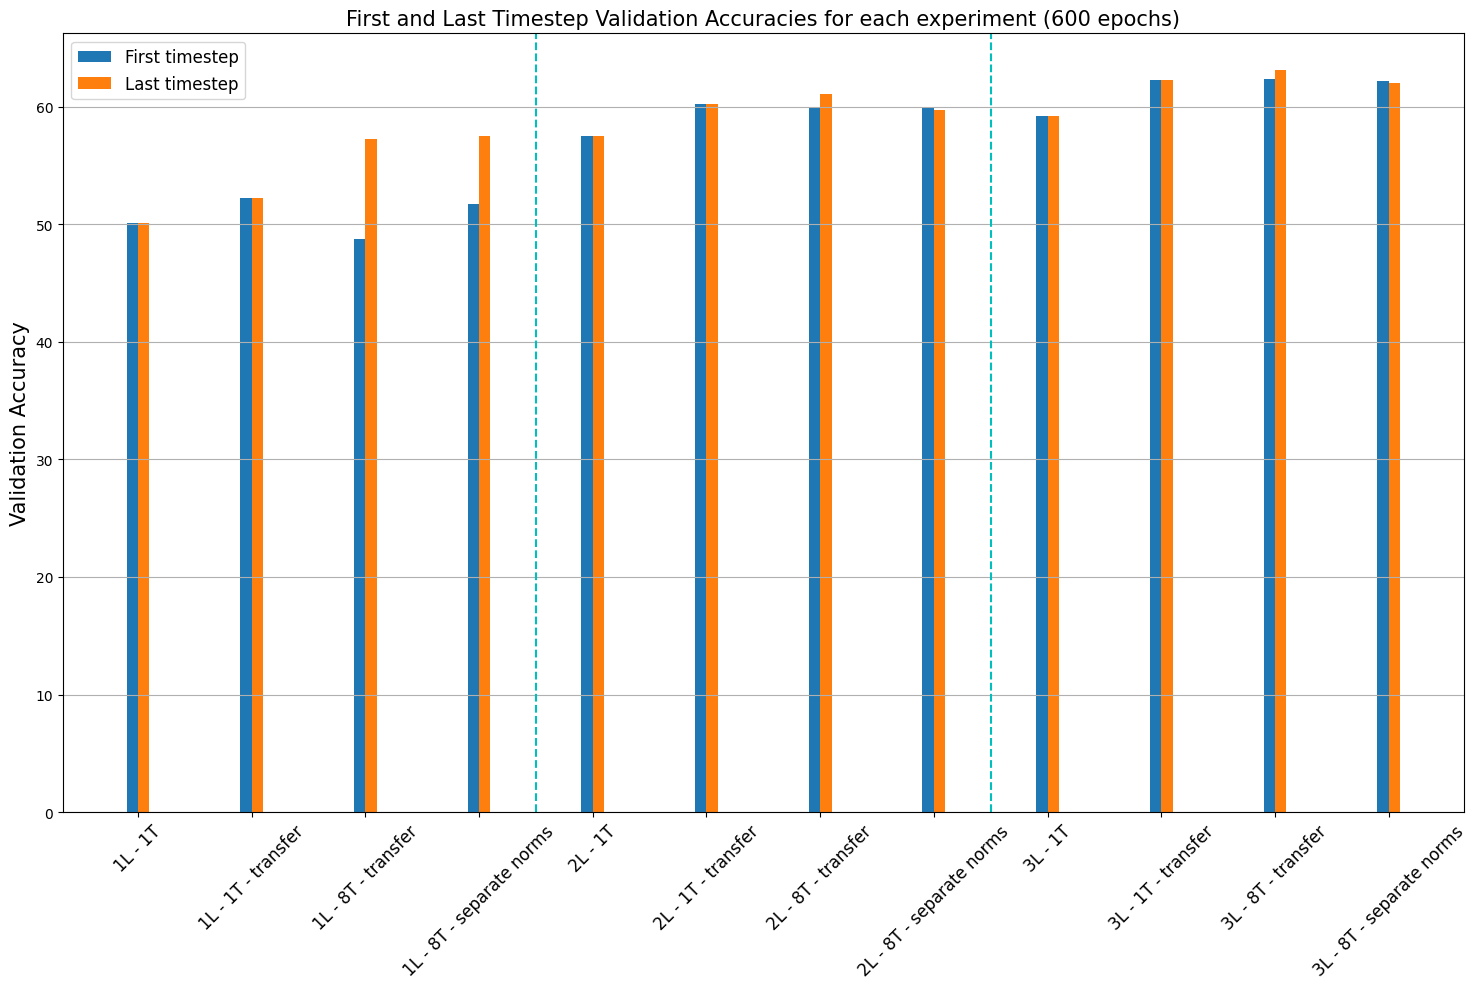

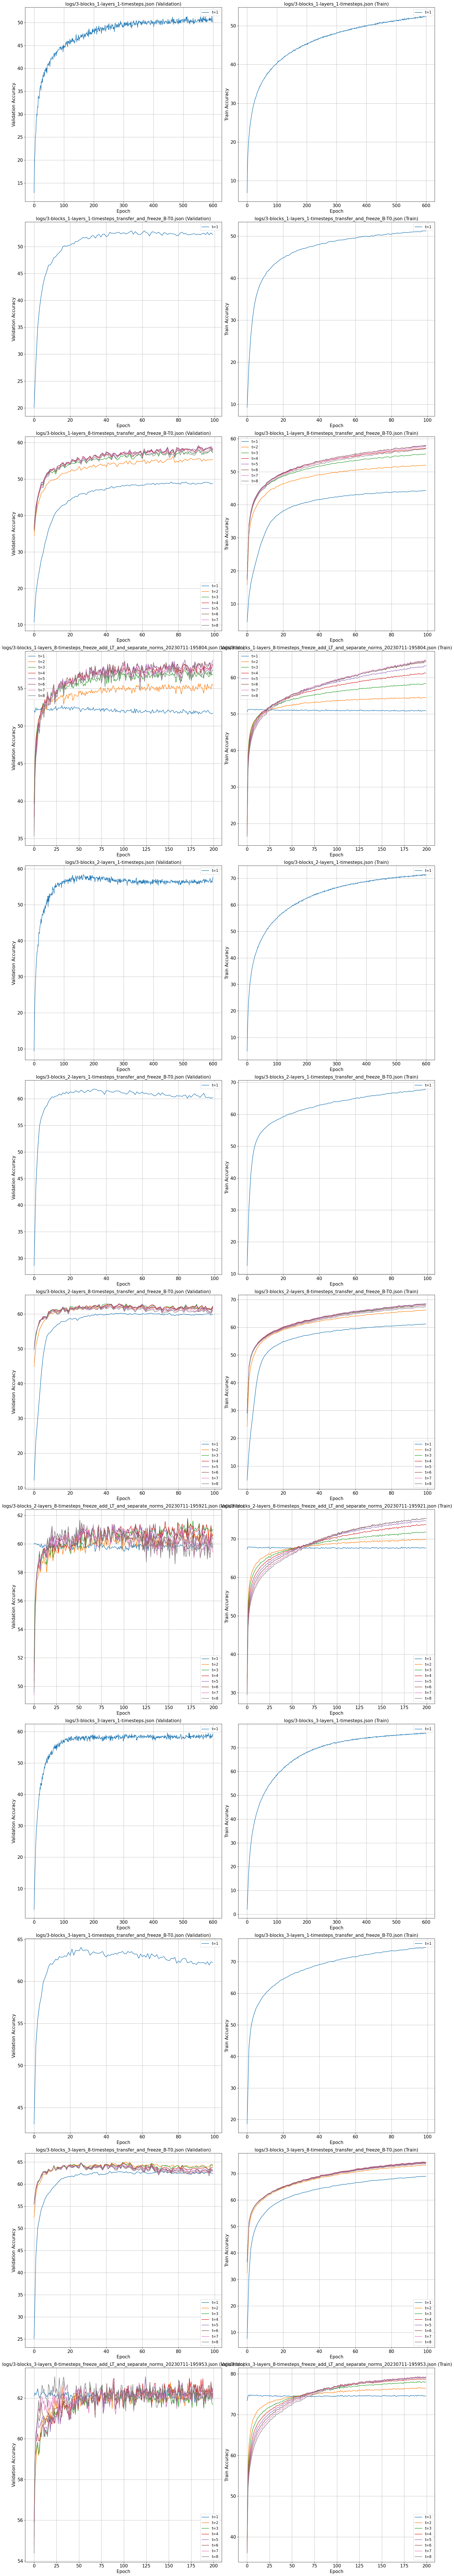

In [27]:
files_3_blocks = [
    '3-blocks_1-layers_1-timesteps.json',
    '3-blocks_1-layers_1-timesteps_transfer_and_freeze_B-T0.json',
    # '3-blocks_1-layers_8-timesteps_transfer_and_freeze_B-T0_XXX.json',
    '3-blocks_1-layers_8-timesteps_freeze_add_LT_and_separate_norms_20230711-195804.json',
    '3-blocks_1-layers_8-timesteps_transfer_and_freeze_B-T0.json',
    # '3-blocks_1-layers_2-timesteps.json',
    # '3-blocks_1-layers_4-timesteps.json',
    # '3-blocks_1-layers_8-timesteps.json',
    '3-blocks_2-layers_1-timesteps.json',
    '3-blocks_2-layers_1-timesteps_transfer_and_freeze_B-T0.json',
    # '3-blocks_2-layers_8-timesteps_transfer_and_freeze_B-T0_XXX.json',
    '3-blocks_2-layers_8-timesteps_transfer_and_freeze_B-T0.json',
    '3-blocks_2-layers_8-timesteps_freeze_add_LT_and_separate_norms_20230711-195921.json',
    # '3-blocks_2-layers_8-timesteps_freeze_add_LT_and_separate_norms.json',
    # '3-blocks_2-layers_2-timesteps.json',
    # '3-blocks_2-layers_4-timesteps.json',
    # '3-blocks_2-layers_8-timesteps.json',
    '3-blocks_3-layers_1-timesteps.json',
    '3-blocks_3-layers_1-timesteps_transfer_and_freeze_B-T0.json',
    # '3-blocks_3-layers_8-timesteps_transfer_and_freeze_B-T0_XXX.json',
    '3-blocks_3-layers_8-timesteps_transfer_and_freeze_B-T0.json',
    # '3-blocks_3-layers_8-timesteps_freeze_add_LT_and_separate_norms.json',
    '3-blocks_3-layers_8-timesteps_freeze_add_LT_and_separate_norms_20230711-195953.json',
    # '3-blocks_3-layers_2-timesteps.json',
    # '3-blocks_3-layers_4-timesteps.json',
    # '3-blocks_3-layers_8-timesteps.json'
]

files_3_blocks = ['logs/' + file for file in files_3_blocks]

plot_first_last_val_accuracies(files_3_blocks)
plot_val_and_train_accuracies_over_epochs_for_all_files(files_3_blocks)

## 2 Blocks

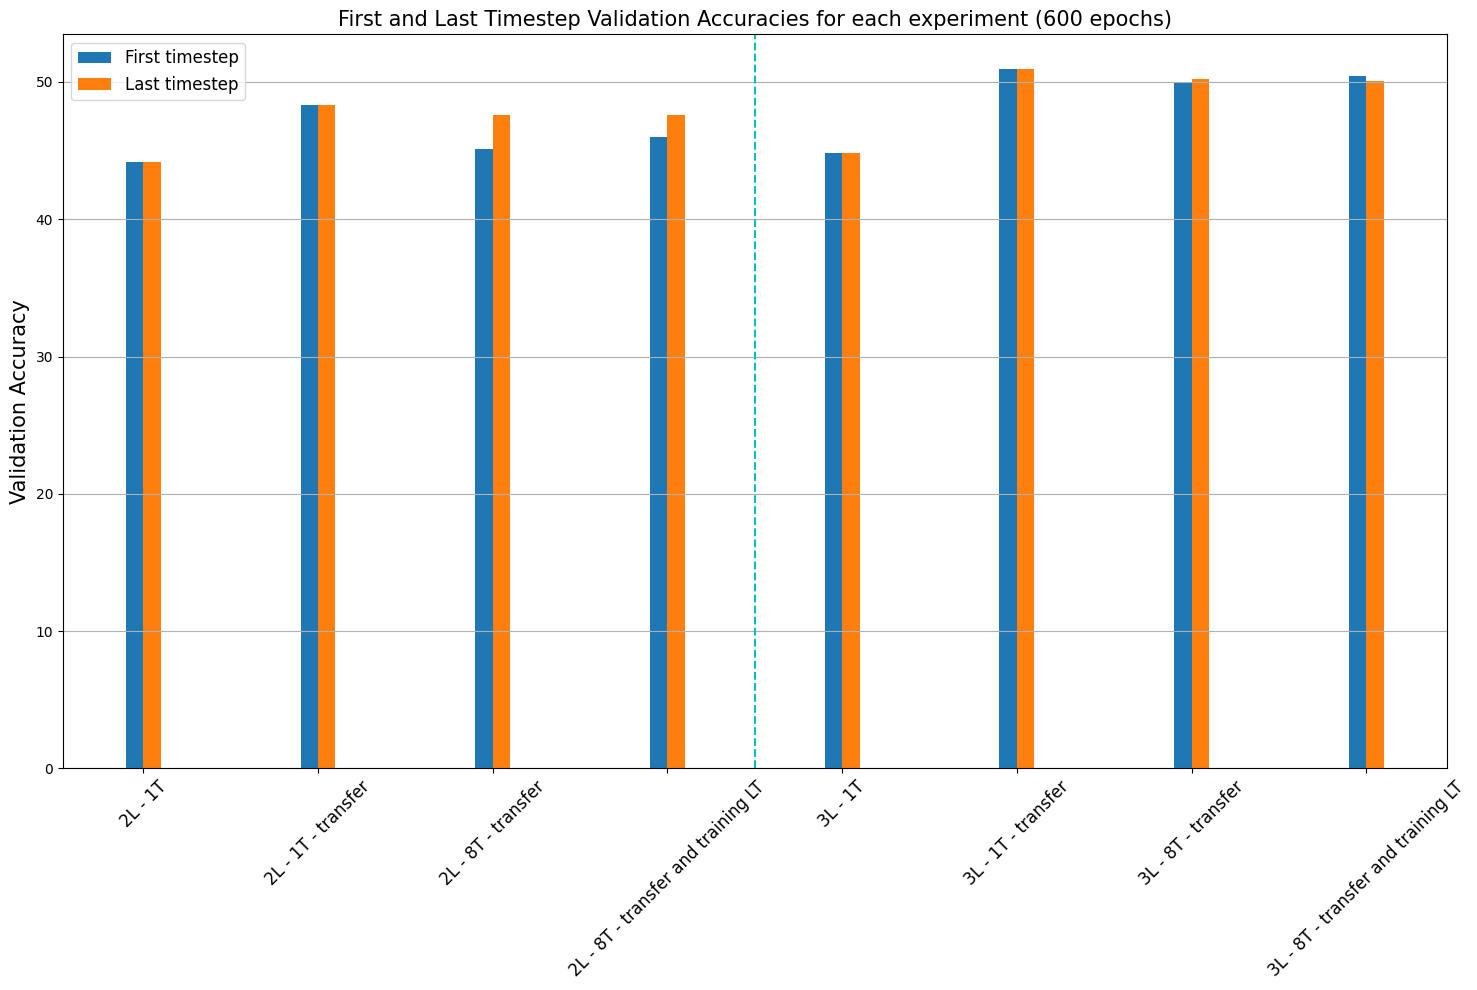

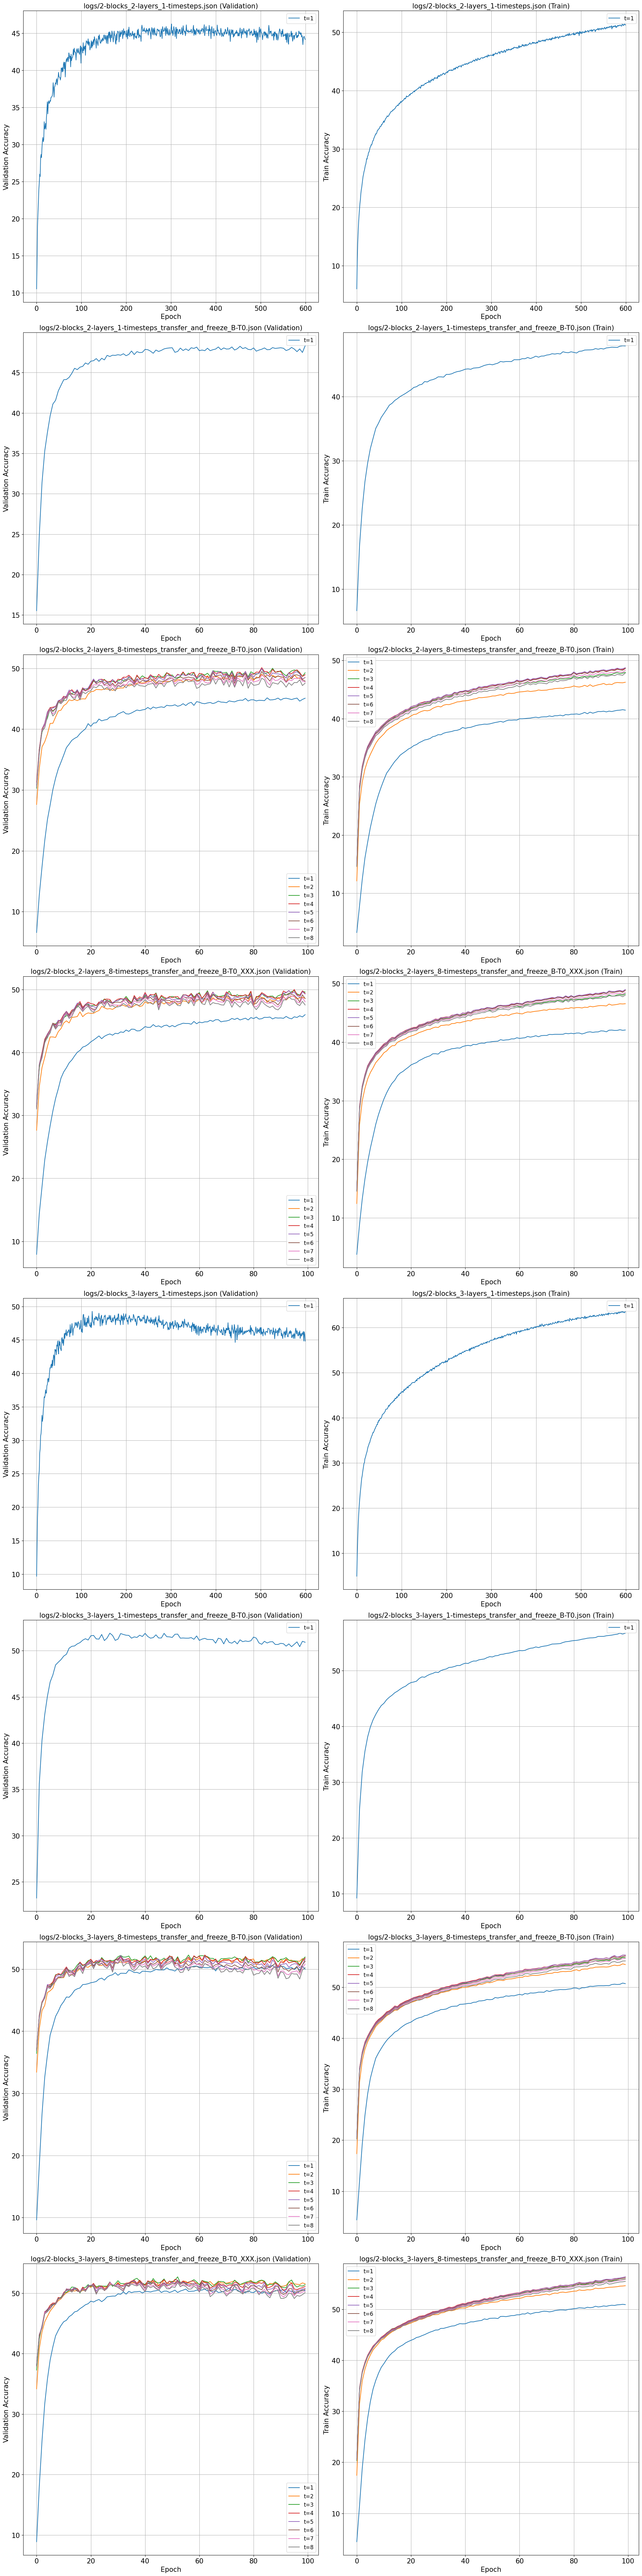

In [12]:
files_2_blocks = [
    # '2-blocks_1-layers_1-timesteps.json',
    # '2-blocks_1-layers_1-timesteps_transfer_and_freeze_B-T0.json',
    # '2-blocks_1-layers_8-timesteps_transfer_and_freeze_B-T0_XXX.json',
    # '2-blocks_1-layers_8-timesteps_freeze_add_LT_and_separate_norms.json',
    # '2-blocks_1-layers_8-timesteps_transfer_and_freeze_B-T0.json',
    # '2-blocks_1-layers_2-timesteps.json',
    # '2-blocks_1-layers_4-timesteps.json',
    # '2-blocks_1-layers_8-timesteps.json',
    '2-blocks_2-layers_1-timesteps.json',
    '2-blocks_2-layers_1-timesteps_transfer_and_freeze_B-T0.json',
    '2-blocks_2-layers_8-timesteps_transfer_and_freeze_B-T0.json',
    # '2-blocks_2-layers_8-timesteps_freeze_add_LT_and_separate_norms.json',
    '2-blocks_2-layers_8-timesteps_transfer_and_freeze_B-T0_XXX.json',
    # '2-blocks_2-layers_2-timesteps.json',
    # '2-blocks_2-layers_4-timesteps.json',
    # '2-blocks_2-layers_8-timesteps.json',
    '2-blocks_3-layers_1-timesteps.json',
    '2-blocks_3-layers_1-timesteps_transfer_and_freeze_B-T0.json',
    '2-blocks_3-layers_8-timesteps_transfer_and_freeze_B-T0.json',
    # '2-blocks_3-layers_8-timesteps_freeze_add_LT_and_separate_norms.json',
    '2-blocks_3-layers_8-timesteps_transfer_and_freeze_B-T0_XXX.json',
    # '2-blocks_3-layers_2-timesteps.json',
    # '2-blocks_3-layers_4-timesteps.json',
    # '2-blocks_3-layers_8-timesteps.json'
]

files_2_blocks = ['logs/' + file for file in files_2_blocks]

plot_first_last_val_accuracies(files_2_blocks)
plot_val_and_train_accuracies_over_epochs_for_all_files(files_2_blocks)

## 1 Block

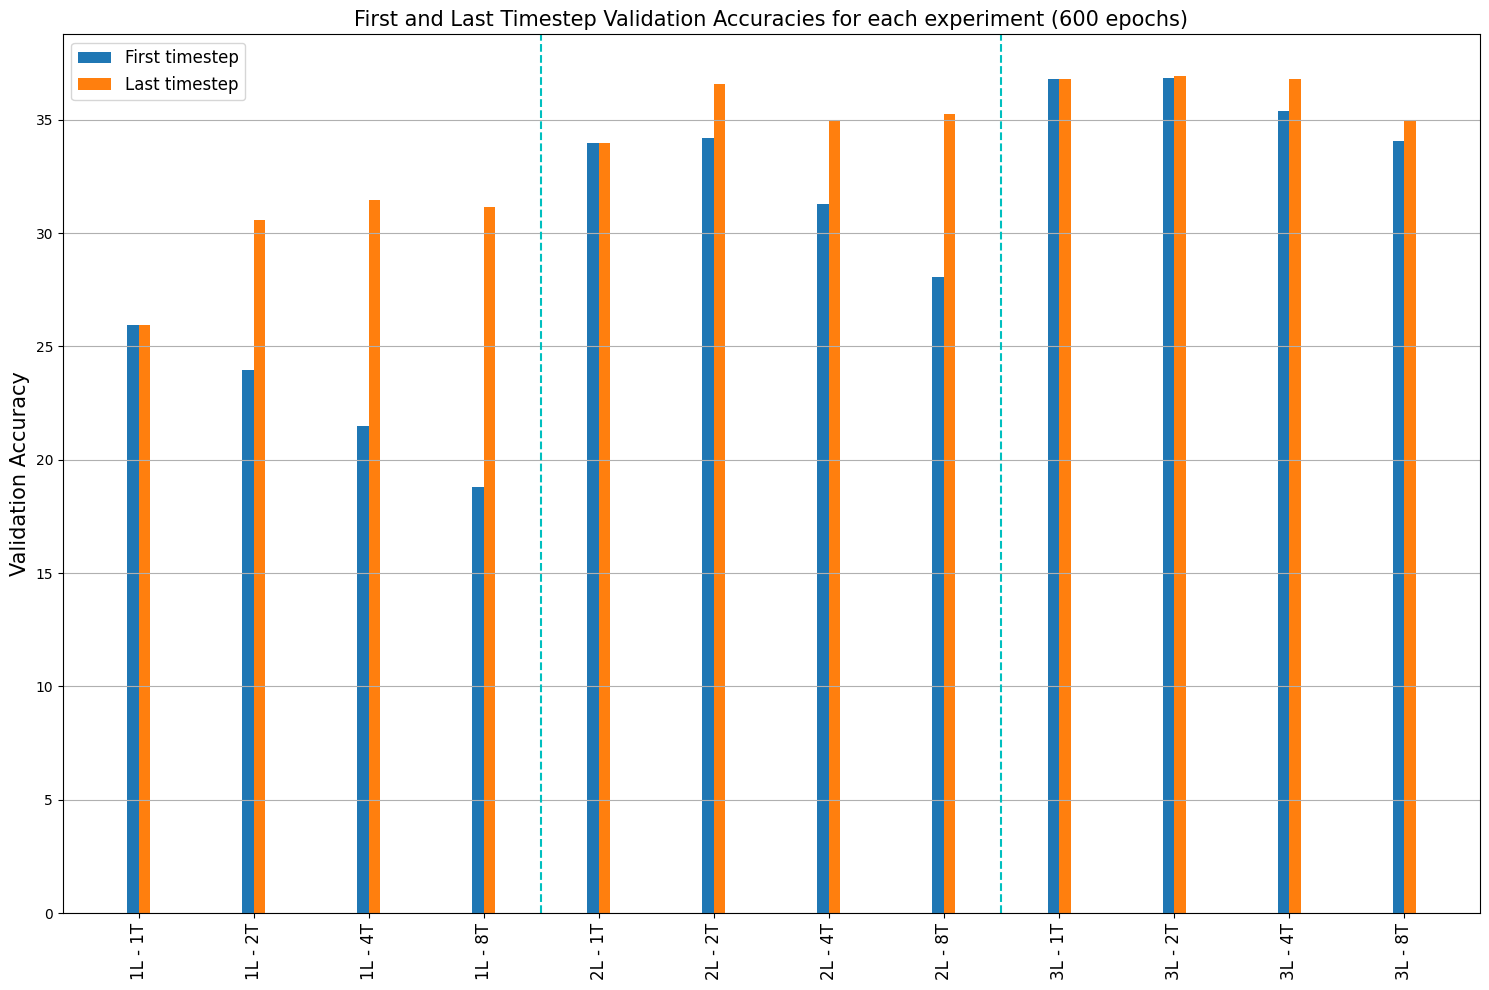

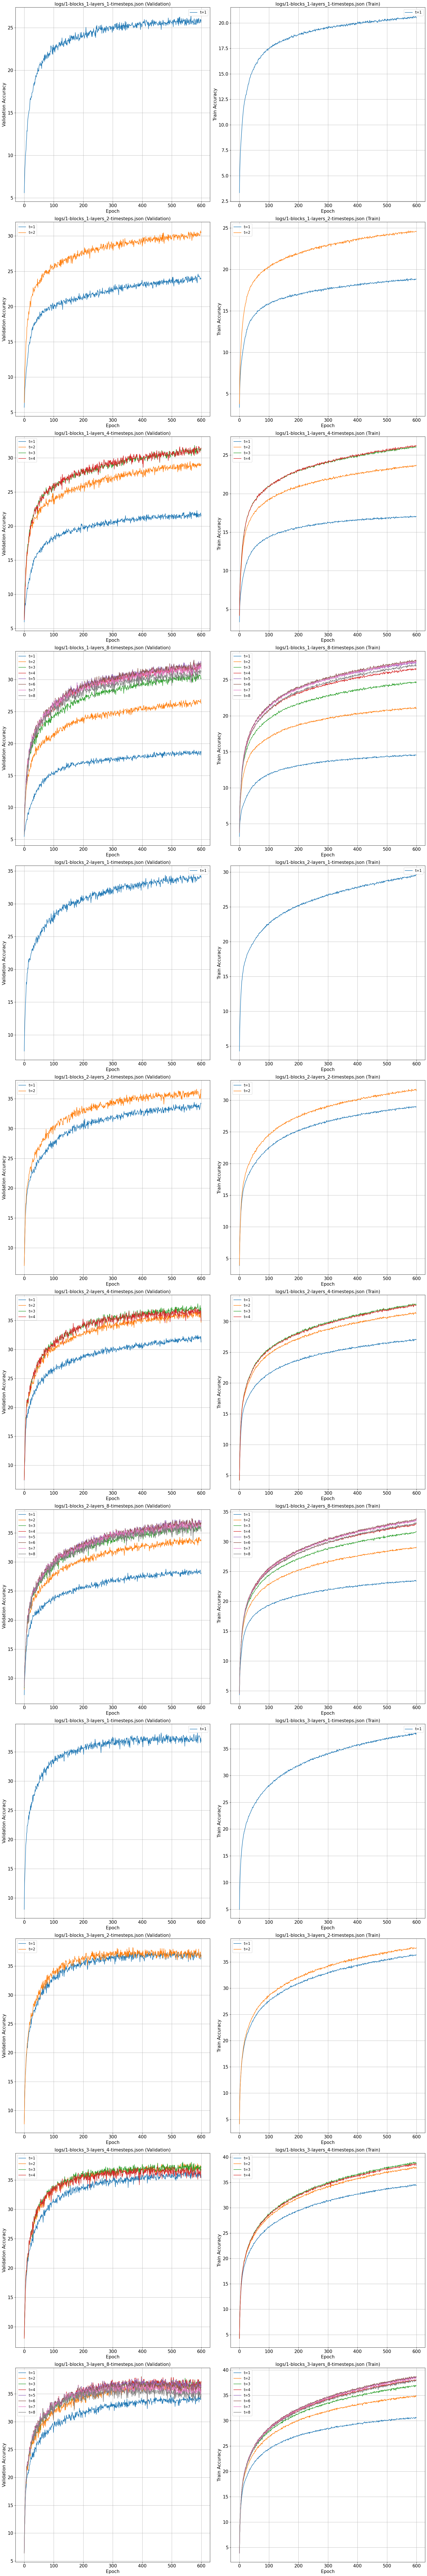

In [10]:
files_1_blocks = [
    '1-blocks_1-layers_1-timesteps.json',
    '1-blocks_1-layers_2-timesteps.json',
    '1-blocks_1-layers_4-timesteps.json',
    '1-blocks_1-layers_8-timesteps.json',
    '1-blocks_2-layers_1-timesteps.json',
    '1-blocks_2-layers_2-timesteps.json',
    '1-blocks_2-layers_4-timesteps.json',
    '1-blocks_2-layers_8-timesteps.json',
    '1-blocks_3-layers_1-timesteps.json',
    '1-blocks_3-layers_2-timesteps.json',
    '1-blocks_3-layers_4-timesteps.json',
    '1-blocks_3-layers_8-timesteps.json'
]

files_1_blocks = ['logs/' + file for file in files_1_blocks]

plot_first_last_val_accuracies(files_1_blocks)
plot_val_and_train_accuracies_over_epochs_for_all_files(files_1_blocks)